# Научные вычисления в Python - NumPy & SciPy

## Создание матриц и векторов

In [1]:
import numpy as np

In [2]:
matrix_from_list = np.array([[1, 3, 4],
                             [2, 0, 5],
                             [4, 4, 1],
                             [0, 1, 0]])

vector_from_list = np.array([2, 1, 3])

print 'The matrix is\n{matrix}\n\nthe vector is\n{vector}'\
        .format(vector=vector_from_list, matrix=matrix_from_list)

The matrix is
[[1 3 4]
 [2 0 5]
 [4 4 1]
 [0 1 0]]

the vector is
[2 1 3]


## Основные операции

### Умножение матрицы на вектор

$$
y = Ax \qquad y_i = \sum_j a_{ij}x_j
$$

In [3]:
matrix_from_list.dot(vector_from_list)

array([17, 19, 15,  1])

### Трансляция

In [4]:
matrix_from_list + vector_from_list

array([[3, 4, 7],
       [4, 1, 8],
       [6, 5, 4],
       [2, 2, 3]])

### Явное указание типа элементов матрицы/вектора

In [5]:
single_precision_vector = np.array([1, 3, 5, 2], dtype=np.float32)
single_precision_vector.dtype

dtype('float32')

### Преобразование типов

In [6]:
vector_from_list.dtype

dtype('int64')

In [7]:
vector_from_list.astype(np.int16)

array([2, 1, 3], dtype=int16)

### Размерности: согласованность размерностей необходимый элемент успешных вычислений!

In [8]:
row_vector = np.array([[1,2,3]])

print 'New vector {} has dimensionality {}'\
        .format(row_vector, row_vector.shape)

print 'The dot-product is: ', matrix_from_list.dot(row_vector)

New vector [[1 2 3]] has dimensionality (1, 3)
The dot-product is: 

ValueError: shapes (4,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [9]:
singleton_vector = row_vector.squeeze()
print 'Squeezed vector {} has shape {}'.format(singleton_vector, singleton_vector.shape)

 Squeezed vector [1 2 3] has shape (3,)


In [10]:
matrix_from_list.dot(singleton_vector)

array([19, 17, 15,  2])

### Добавление размерности

In [11]:
print singleton_vector[:, np.newaxis]

[[1]
 [2]
 [3]]


In [12]:
mat = np.arange(12)
mat.reshape(-1, 4)
mat

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [13]:
print singleton_vector[:, None]

[[1]
 [2]
 [3]]


## Индексирвоание и slicing

In [14]:
vector12 = np.arange(12)
vector12

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Угадайте, что будет результатом следующих операций:
```python
vector12[:3]
vector12[-1]
vector12[:-2]
vector12[3:7]
vector12[::2]
vector12[::-1]
```

In [15]:
matrix43 = vector12.reshape(4, 3)
matrix43

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

Угадайте, что будет результатом следующих операций:
```python
matrix43[:, 0]
matrix43[-1, :]
matrix43[::2, :]
matrix43[:3, :-1]
matrix43[3:, 1]
```

### Отличие от MATLAB

- Индексация с 0
- Массивы в NumPy по умолчанию хранятся по столбцам

## Представление (view) vs Копия

- Работа с представлениями более эффективна и предпочтительна

- Представление возвращатся при использование основных slicing-операций

- Детали: http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

Сделать копию просто

In [558]:
matrix43_copy = matrix43[:]

## Изменение размерностей (reshaping)

In [16]:
matrix_to_reshape = np.random.randint(10, 99, size=(6, 4))
matrix_to_reshape

array([[90, 53, 95, 27],
       [45, 33, 47, 58],
       [44, 40, 51, 30],
       [80, 24, 20, 26],
       [39, 97, 65, 78],
       [81, 37, 97, 38]])

In [17]:
reshaped_matrix = matrix_to_reshape.reshape(8, 3)
reshaped_matrix

array([[90, 53, 95],
       [27, 45, 33],
       [47, 58, 44],
       [40, 51, 30],
       [80, 24, 20],
       [26, 39, 97],
       [65, 78, 81],
       [37, 97, 38]])

## Reshape всегда возвращает представление

In [23]:
reshaped_matrix[-1, 0] = 1
np.set_printoptions(formatter={'all':lambda x: '_{}_'.format(x) if x < 10 else str(x)})
matrix_to_reshape[:]

array([[90, 53, 95, 27],
       [45, 33, 47, 58],
       [44, 40, 51, 30],
       [80, 24, 20, 26],
       [39, 97, 65, 78],
       [81, _1_, 97, 38]])

In [24]:
np.set_printoptions()

## Булева индексация

In [25]:
idx = matrix43 > 4
matrix43[idx]

array([ 5,  6,  7,  8,  9, 10, 11])

## Полезные NumPy-функции

- ``np.eye()`` - создание единичной матрицы
- ``np.ones()`` - создание матрицы из всех единиц
- ``np.zeros()`` - создание нулевой матрицы
- ``np.diag()`` - создание диагональной матрицы или извлечение диагонали из данной матрицы

### Пример

Построить трёхдиагональную матрицу с -2 на диагонали и 1 на над- и поддиагоналях

In [26]:
def three_diagonal(N):
    A = np.zeros((N, N), dtype=np.int)
    for i in range(N):
        A[i, i] = -2
        if i > 0:
            A[i, i-1] = 1
        if i < N-1:
            A[i, i+1] = 1
    return A

print three_diagonal(5)

[[-2  1  0  0  0]
 [ 1 -2  1  0  0]
 [ 0  1 -2  1  0]
 [ 0  0  1 -2  1]
 [ 0  0  0  1 -2]]


In [27]:
def numpy_three_diagonal(N):
    main_diagonal = -2 * np.eye(N)
    
    suddiag_value = np.ones(N-1,)
    lower_subdiag = np.diag(suddiag_value, k=-1)
    upper_subdiag = np.diag(suddiag_value, k=1)
    
    result = main_diagonal + lower_subdiag + upper_subdiag
    return result.astype(np.int)

numpy_three_diagonal(5)

array([[-2,  1,  0,  0,  0],
       [ 1, -2,  1,  0,  0],
       [ 0,  1, -2,  1,  0],
       [ 0,  0,  1, -2,  1],
       [ 0,  0,  0,  1, -2]])

### "Сокращатели" (reducers): sum, mean, max, min, all, any

In [28]:
A = numpy_three_diagonal(5)
A[0, -1] = 5
A[-1, 0] = 3

print A
print A.sum()
print A.min()
print A.max(axis=0)
print A.sum(axis=0)
print A.mean(axis=1)
print (A > 4).any(axis=1)

[[-2  1  0  0  5]
 [ 1 -2  1  0  0]
 [ 0  1 -2  1  0]
 [ 0  0  1 -2  1]
 [ 3  0  0  1 -2]]
6
-2
[3 1 1 1 5]
[2 0 0 0 4]
[ 0.8  0.   0.   0.   0.4]
[ True False False False False]


### Математические функции в NumPy

In [29]:
print np.pi

3.14159265359


In [30]:
args = np.arange(0, 2.5*np.pi, 0.5*np.pi)

In [31]:
print np.sin(args)

[  0.00000000e+00   1.00000000e+00   1.22464680e-16  -1.00000000e+00
  -2.44929360e-16]


In [35]:
print np.round(np.sin(args), decimals=2)

[ 0.  1.  0. -1. -0.]


### Управление форматом вывода

In [36]:
'{}, {:.1%}, {:e}, {:.2f}, {:.0f}'.format(*np.sin(args))

'0.0, 100.0%, 1.224647e-16, -1.00, -0'

In [37]:
np.set_printoptions(formatter={'all':lambda x: '{:.2f}'.format(x)})
print np.sin(args)
np.set_printoptions()

[0.00 1.00 0.00 -1.00 -0.00]


### Сетки

- ``np.linspace``
- ``np.meshgrid``

### Пример

Функция 
$$
f(x, y) = \sin(x+y)
$$
на некоторой сетке.

In [38]:
linear_index = np.linspace(0, np.pi, 10, endpoint=True)
mesh_x, mesh_y = np.meshgrid(linear_index, linear_index)

values_3D = np.sin(mesh_x + mesh_y)

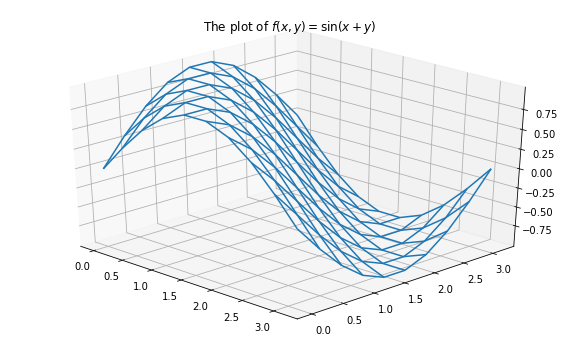

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.plot_wireframe(mesh_x, mesh_y, values_3D)
ax.view_init(azim=-45, elev=30)

plt.title('The plot of $f(x, y) = \sin(x+y)$')

# Scipy - scientific computing 2

## Building sparse matrix

In [577]:
import scipy.sparse as sp

In [578]:
def scipy_three_diagonal(N):
    main_diagonal = -2 * np.ones(N, )
    suddiag_values = np.ones(N-1,)
    
    diagonals = [main_diagonal, suddiag_values, suddiag_values]
    # Another option: use sp.eye(N) and add subdiagonals
    offsets = [0, 1, -1]
    
    result = sp.diags(diagonals, offsets, shape=(N, N), format='coo')
    return result

my_sparse_matrix = scipy_three_diagonal(5)

### How does scipy represent sparse matrix?

In [579]:
my_sparse_matrix

<5x5 sparse matrix of type '<type 'numpy.float64'>'
	with 13 stored elements in COOrdinate format>

Sparse matrix stores only non-zero elements (and their indices)

In [580]:
print my_sparse_matrix

  (0, 0)	-2.0
  (1, 1)	-2.0
  (2, 2)	-2.0
  (3, 3)	-2.0
  (4, 4)	-2.0
  (0, 1)	1.0
  (1, 2)	1.0
  (2, 3)	1.0
  (3, 4)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 3)	1.0


### Restoring full matrix

In [581]:
my_sparse_matrix.toarray()

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

In [582]:
my_sparse_matrix.A

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

## Popular  (not sparse) matrices:

In [583]:
from scipy.linalg import toeplitz, hankel

In [584]:
hankel(xrange(4), [-1, -2, -3, -4])

array([[ 0,  1,  2,  3],
       [ 1,  2,  3, -2],
       [ 2,  3, -2, -3],
       [ 3, -2, -3, -4]])

In [585]:
toeplitz(xrange(4))

array([[0, 1, 2, 3],
       [1, 0, 1, 2],
       [2, 1, 0, 1],
       [3, 2, 1, 0]])

# Timing - measuring performance

## Simplest way to measure time

In [586]:
N = 1000
%timeit three_diagonal(N)
%timeit numpy_three_diagonal(N)
%timeit scipy_three_diagonal(N)

1000 loops, best of 3: 1.53 ms per loop
10 loops, best of 3: 20.6 ms per loop
1000 loops, best of 3: 272 µs per loop


You can also use `%%timeit` magic to measure run time of the whole cell

In [587]:
%%timeit
N = 1000
calc = three_diagonal(N)
calc = scipy_three_diagonal(N)
del calc

100 loops, best of 3: 2.17 ms per loop


## Storing timings in a separate variable

Avoid using `time.time()` or `time.clock()` directly as their behaviour's different depending on platform; `default_timer` makes the best choice for you. It measures wall time though, e.g. not very precise.

In [588]:
from timeit import default_timer as timer

In [589]:
dims = [300, 1000, 3000, 10000]
bench_names = ['loop', 'numpy', 'scipy']
timings = {bench:[] for bench in bench_names}

for n in dims:
    start_time = timer()
    calc = three_diagonal(n)
    time_delta = timer() - start_time
    timings['loop'].append(time_delta)
    
    start_time = timer()
    calc = numpy_three_diagonal(n)
    time_delta = timer() - start_time
    timings['numpy'].append(time_delta)
    
    start_time = timer()
    calc = scipy_three_diagonal(n)
    time_delta = timer() - start_time
    timings['scipy'].append(time_delta)

Let's make the code less redundant

In [590]:
dims = [300, 1000, 3000, 10000]
bench_names = ['loop', 'numpy', 'scipy']
timings = {bench_name: [] for bench_name in bench_names}

def timing_machine(func, *args, **kwargs):
    start_time = timer()
    result = func(*args, **kwargs)
    time_delta = timer() - start_time
    return time_delta

for n in dims:
    timings['loop'].append(timing_machine(three_diagonal, n))
    timings['numpy'].append(timing_machine(numpy_three_diagonal, n))
    timings['scipy'].append(timing_machine(scipy_three_diagonal, n))

## `timeit` with -o parameter

more details on different parameters:
https://ipython.org/ipython-doc/dev/interactive/magics.html#magic-timeit

In [612]:
timeit_result = %timeit -q -r 5 -o three_diagonal(10)
print 'Best of {} runs: {:.8f}s'.format(timeit_result.repeat,
                                        timeit_result.best)

Best of 5 runs: 0.00000565s


Our new benchmark procedure

In [592]:
dims = [300, 1000, 3000, 10000]
bench_names = ['loop', 'numpy', 'scipy']
bench_funcs = [three_diagonal, numpy_three_diagonal, scipy_three_diagonal]
timings_best = {bench_name: [] for bench_name in bench_names}

for bench_name, bench_func in zip(bench_names, bench_funcs):
    print '\nMeasuring {}'.format(bench_func.func_name)
    for n in dims:
        print n,
        time_result = %timeit -q -o bench_func(n)
        timings_best[bench_name].append(time_result.best)


Measuring three_diagonal
300 1000 3000 10000 
Measuring numpy_three_diagonal
300 1000 3000 10000 
Measuring scipy_three_diagonal
300 1000 3000 10000


# Matplotlib - plotting in python

don't forget to check
* http://matplotlib.org/users/pyplot_tutorial.html
* http://matplotlib.org/gallery.html
* http://matplotlib.org/examples/index.html

## Configuring matplotlib

In [593]:
import matplotlib.pyplot as plt
%matplotlib inline 

`%matplotlib inline` ensures all graphs are plotted inside your notebook

## Global controls

(more at http://matplotlib.org/users/customizing.html)

In [594]:
# plt.rcParams.update({'axes.labelsize': 'large'})
plt.rcParams.update({'font.size': 14})

## Combined plot

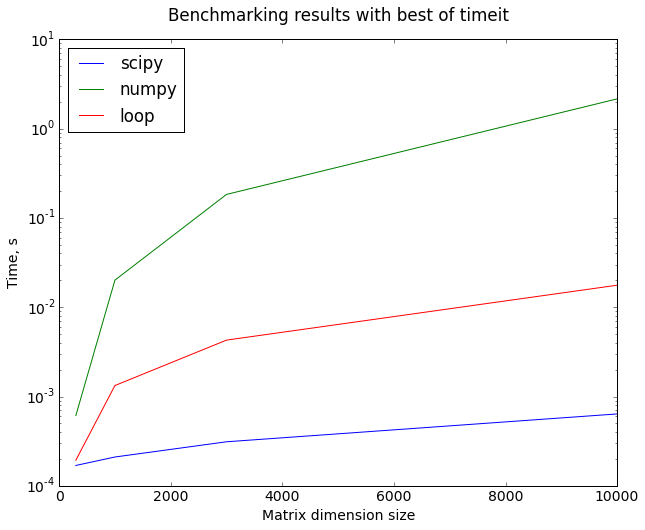

In [595]:
plt.figure(figsize=(10,8))

for bench_name, values in timings_best.iteritems():
    plt.semilogy(dims, values, label=bench_name)
    
plt.legend(loc='best')
plt.title('Benchmarking results with best of timeit', y=1.03)
plt.xlabel('Matrix dimension size')
plt.ylabel('Time, s')

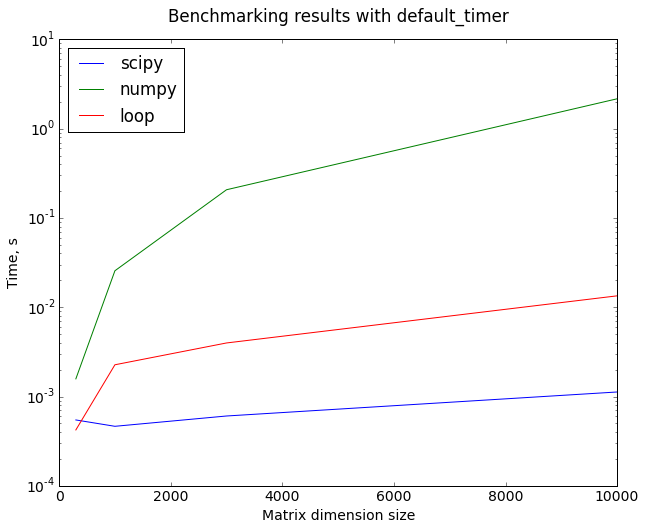

In [596]:
plt.figure(figsize=(10,8))

for bench_name, values in timings.iteritems():
    plt.semilogy(dims, values, label=bench_name)
    
plt.legend(loc='best')
plt.title('Benchmarking results with default_timer', y=1.03)
plt.xlabel('Matrix dimension size')
plt.ylabel('Time, s')

**Think, why:**
* "loop" was faster then "numpy"
* "scipy" is almost constant
* results for *default_timer* and *"best of timeit"* are different

You might want to read the docs:
* https://docs.python.org/2/library/timeit.html#timeit.default_timer
* https://docs.python.org/2/library/time.html#time.clock and https://docs.python.org/2/library/time.html#time.time

**Remark:** starting from *python 3.3* it's recommended to use ```time.perf_counter()``` and ```time.process_time()```
https://docs.python.org/3/library/time.html#time.perf_counter

Also note, that for advanced benchmarking it's better to use profiling tools.

### Combined plot "one-liner"

Use ```plt.plot?``` to get detailed info on function usage.

**Task**: given lists of x-values, y-falues and plot format strings, plot all three graphs in one line.

*Hint*: use list comprehensions

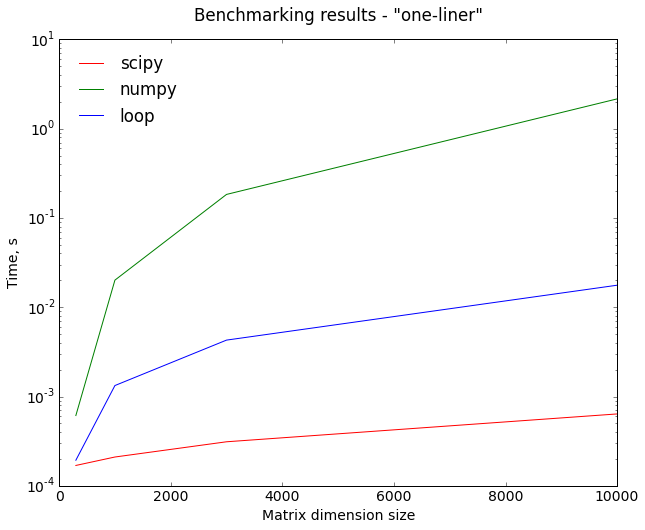

In [597]:
k = len(timings_best)
iter_xyf = [item for sublist in zip([dims]*k,
                                    timings_best.values(),
                                    list('rgb'))\
                                for item in sublist]

plt.figure(figsize=(10, 8))
plt.semilogy(*iter_xyf)

plt.legend(timings_best.keys(), loc=2, frameon=False)
plt.title('Benchmarking results - "one-liner"', y=1.03)
plt.xlabel('Matrix dimension size')
plt.ylabel('Time, s')

Even simpler way - also gives you granular control on plot objects

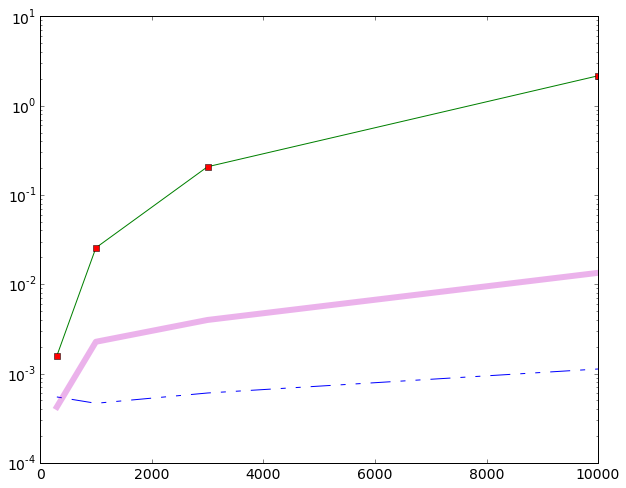

In [598]:
plt.figure(figsize=(10, 8))

figs = [plt.semilogy(dims, values, label=bench_name)\
        for bench_name, values in timings.iteritems()];

ax0, = figs[0]
ax0.set_dashes([5, 10, 20, 10, 5, 10])

ax1, = figs[1]
ax1.set_marker('s')
ax1.set_markerfacecolor('r')

ax2, = figs[2]
ax2.set_linewidth(6)
ax2.set_alpha(0.3)
ax2.set_color('m')

## Plot formatting

matplotlib has a number of different options for styling your plot

In [599]:
all_markers = [
'.', # point
',', # pixel
'o', # circle
'v', # triangle down
'^', # triangle up
'<', # triangle_left
'>', # triangle_right
'1', # tri_down
'2', # tri_up
'3', # tri_left
'4', # tri_right
'8', # octagon
's', # square
'p', # pentagon
'*', # star
'h', # hexagon1
'H', # hexagon2
'+', # plus
'x', # x
'D', # diamond
'd', # thin_diamond
'|', # vline
]

all_linestyles = [
'-',  # solid line style
'--', # dashed line style
'-.', # dash-dot line style
':',  # dotted line style
'None'# no line
]

all_colors = [
'b', # blue
'g', # green
'r', # red
'c', # cyan
'm', # magenta
'y', # yellow
'k', # black
'w', # white
]

## Subplots

for advanced usage of subplots start here
* http://matplotlib.org/examples/pylab_examples/subplots_demo.html
* http://matplotlib.org/users/tight_layout_guide.html
* http://matplotlib.org/users/gridspec.html

### Iterating over subplots

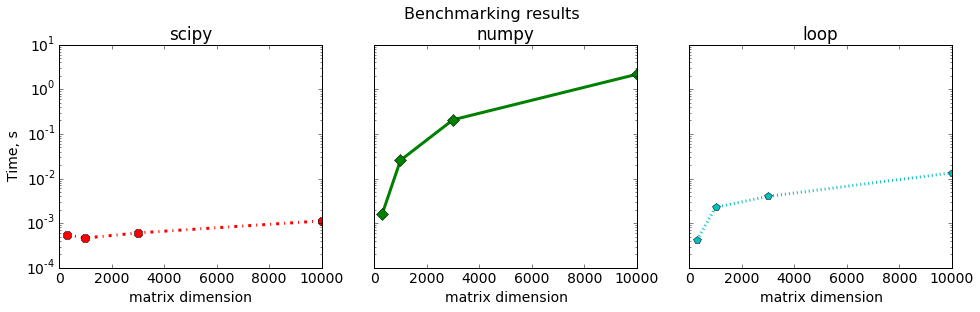

In [622]:
n = len(timings)
experiment_names = timings.keys()

fig, axes = plt.subplots(1, n, sharey=True, figsize=(16,4))

colors = np.random.choice(list('rgbcmyk'), n, replace=False)
markers = np.random.choice(all_markers, n, replace=False)
lines = np.random.choice(all_linestyles, n, replace=False)

for ax_num, ax in enumerate(axes):
    key = experiment_names[ax_num]
    ax.semilogy(dims, timings[key], label=key,
            color=colors[ax_num],
            marker=markers[ax_num],
            markersize=8,
            linestyle=lines[ax_num],
            lw=3)
    ax.set_xlabel('matrix dimension')
    ax.set_title(key)

axes[0].set_ylabel('Time, s')
plt.suptitle('Benchmarking results', fontsize=16,  y=1.03)


### Manual control of subplots

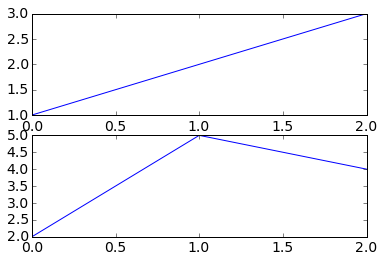

In [601]:
plt.figure()
plt.subplot(211)
plt.plot([1,2,3])

plt.subplot(212)
plt.plot([2,5,4])

**Task**: create subplot with 2 columns and 2 rows. Leave bottom left quarter empty. Scipy and numpy benchmarks should go into top row.

# Другие темы

- Функции-обёртки и декораторы

- Установка пакетов

- Импортирование модулей

- Магия Jupyter

- Qtconsole

- Окружения

- Расширения

- Профилирование

- Отладка

- Cython & Numba

- Openmp

- OOP

- Python 2 vs Python 3

- plotting in python - palletes and colormaps, styles

- Pandas - представление результатов

- Конфигурация Jupyter

- etc...

# Solutions

**Task 1**

In [602]:
items = ['foo', 'bar', 'baz', 'foo', 'baz', 'bar']

method 1

In [603]:
from collections import defaultdict

item_ids = defaultdict(lambda: len(item_ids))
map(item_ids.__getitem__, items)

[0, 1, 2, 0, 2, 1]

method 2

In [604]:
import pandas as pd

pd.DataFrame({'items': items}).groupby('items', sort=False).grouper.group_info[0]

array([0, 1, 2, 0, 2, 1], dtype=int64)

method 3

In [605]:
import numpy as np

np.unique(items, return_inverse=True)[1]

array([2, 0, 1, 2, 1, 0])

method 4

In [606]:
last = 0
counts = {}
result = []
for item in items:
    try:
        count = counts[item]
    except KeyError:
        counts[item] = count = last
        last += 1
    result.append(count)

result

[0, 1, 2, 0, 2, 1]

**Task 2**

In [607]:
N = 1000

In [608]:
from itertools import permutations

%timeit list(permutations(xrange(N), 2))

10 loops, best of 3: 78.6 ms per loop


Hankel matrix: $a_{ij} = a_{i-1, j+1}$

In [609]:
import numpy as np
from scipy.linalg import hankel

def pairs_idx(n):
    return np.vstack((np.repeat(xrange(n), n-1), hankel(xrange(1, n), xrange(-1, n-1)).ravel()))

In [610]:
%timeit pairs_idx(N)

100 loops, best of 3: 17.6 ms per loop
